In [1]:
# Callin Switzer
# 23 May 2017
# Get all node values from a trained network, given a set of weights

In [2]:
import numpy as np
import pickle
import os
import pandas as pd

In [3]:
# this function returns values of all layers
def returnLayerValues(weights, inputData):
    '''
    Returns all layer values from fitted network (including input and output)
    
    The fitted network uses "tanh" activation for hidden layers and
        "linear" activation for the final layer
        
    Params:
        weights (list): list of weights from a fitted model
        inputData (array or Data frame): input data that will be run through the network
    
    Returns:
        layer values (list): values of all of the units in the network.
            - the 0'th item in the list is the input data
            - the final item in the list is the final prediction
    '''
    
    LayerValues = [inputData.astype("float64")]
    for layerNum in np.arange(0, len(weights), 2):
        
        # calculate dot product and add bias
        nextLayer = np.dot(LayerValues[-1], weights[layerNum]) + weights[layerNum+1]
        
        if layerNum != (len(weights)-2):
            # apply activation function, except for final layer
            nextLayer = np.tanh(nextLayer)
        
        # append to list
        LayerValues.append(nextLayer)
        
    return(LayerValues)

In [4]:
# load example data
pathToTrainingX= r"C:\Users\Theodore\Dropbox\ExampleData\X_train_small.csv"
x_train = pd.read_csv(pathToTrainingX)

# in case you want to compare predicted to actual, you can load the Y dataset
pathToTrainingY= r"C:\Users\Theodore\Dropbox\ExampleData\Y_train_small.csv"
y_train = pd.read_csv(pathToTrainingY)

In [5]:
# load weights
pathToWeights = r"C:\Users\Theodore\Dropbox\ExampleData\Opt_rmsprop__Dro_0.0__Num_20_20_16__Wei_0_pruned_wts.pkl"

# read in weight data
wts =  pickle.load(open(pathToWeights, 'rb'))

# print sizes of each weight matrix
wtLengths = []
for ii in range(len(wts)):
    print(wts[ii].shape)
    wtLengths.append(np.prod(wts[ii].shape))

# print total number of weights (including biases)
print(np.sum(wtLengths), "total weights")

(10, 20)
(20,)
(20, 20)
(20,)
(20, 16)
(16,)
(16, 7)
(7,)
1095 total weights


In [6]:
# Specify upper limit for maximal layer size
MaxSize = 100

In [7]:
# calculate values at each layer, using the function above
intermediateValues = returnLayerValues(wts, inputData= x_train)
len(intermediateValues)

5

In [9]:
# calculate intermediate values for only one input row
intermediateValues = returnLayerValues(wts, inputData= x_train.iloc[100, :])
intermediateValues

[phi_0         -0.409348
 theta_0       -0.274196
 x_99          -0.050192
 y_99           0.231967
 phi_99        -0.181011
 theta_99      -0.134669
 x_dot_0       -0.048949
 y_dot_0        0.254013
 phi_dot_0     -0.184300
 theta_dot_0    0.382404
 Name: 100, dtype: float64,
 array([-0.00037373,  0.05526478, -0.18791812, -0.00862643,  0.14960592,
        -0.01824989, -0.0180793 , -0.10130025, -0.15857993,  0.22719107,
        -0.0702016 ,  0.05605233,  0.12455265,  0.0370554 , -0.05476996,
        -0.02714874, -0.15073642, -0.05641231,  0.00412464, -0.17011276]),
 array([-0.27744069,  0.03599084, -0.54118625, -0.08809653, -0.01698564,
         0.02638331,  0.01241272,  0.09940099, -0.36583323, -0.02034356,
        -0.07745338,  0.03339437,  0.78730994, -0.01067186, -0.00905854,
        -0.22131837, -0.08888072,  0.28956807, -0.03584398, -0.01646284]),
 array([ 0.05163576, -0.02724393, -0.07589541,  0.60938208,  0.76910681,
        -0.80084544, -0.02049618,  0.11150431, -0.01621602, -

# View the Values on the Nodes for the Input

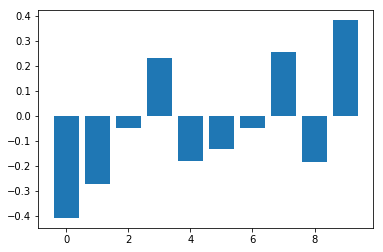

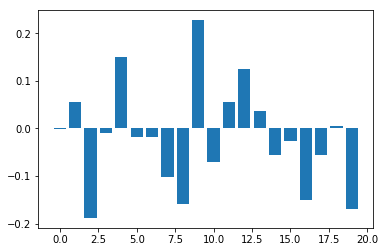

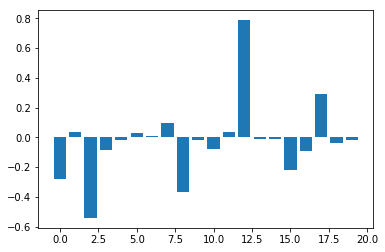

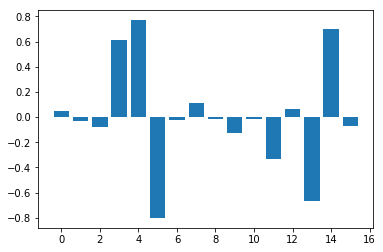

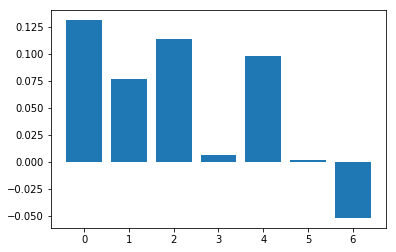

In [11]:
import matplotlib.pyplot as plt
for l in intermediateValues:
    plt.figure()
    plt.bar(range(len(l)), l)

# Create Weight Network Graph json File

In [13]:
import json

nodes = []
links = []
# iterate through the layers to get links and nodes
for layerNum in np.arange(0, len(wts), 2):
    m, n = wts[layerNum].shape
    for i in range(m):
        node_id = int(layerNum/2*MaxSize + i)
        nodes.append({'id':node_id, 'LayerNum':int(layerNum/2), 'NodeNum':i})
        for j in range(n):
            source = node_id
            target = int((layerNum/2+1)*MaxSize + j)
            links.append({'source':source, 'target':target, 'weight':float(wts[layerNum][i,j])})
# output layer nodes
for l in range(len(wts[-1])):
    node_id = int(len(wts)/2*MaxSize + l)
    nodes.append({'id':node_id, 'LayerNum':int(len(wts)/2), 'NodeNum':i})
# Build the network graph
Graph = {'nodes': nodes, 'links': links}
with open('NetworkGraph.json', 'w') as fp:
    json.dump(Graph, fp)                      